In [1]:
from datetime import datetime as dt
import os 
import pandas as pd
import numpy as np

# Duomenų šaltinis https://data.gov.lt/datasets/1828/#resources
data_files=['2021_I_kiti','2021_I_ŠPAM','2021_I_VKK','2021_II_kiti','2021_II_ŠPAM','2021_II_VKK']
data_dir="../../../duomenys/data_gov_lt/elektra" # atsisiųsti failai
data_dir_git="./git_copy/el_vartotojai_2021_stats" # konvertuoti csv saugomi čia pat
data_file_ext="csv_" # "*.csv_" sinchronizuojama GIT
data_cols=['KWH01','KWH02','KWH03','KWH04','KWH05','KWH06','KWH07','KWH08','KWH09','KWH10','KWH11','KWH12']

print(f"Pasiruošta {dt.now().replace(microsecond=0)} \n")
# print(os.getcwd())

file_list = os.listdir(data_dir_git)
# Print elements containing 'abc', one per line
for file in file_list:
    if 'utf' in file:
        print(file)

# c:\Users\Eridas\Documents\vilniuscoding2024\git\DataScienceNotebooks\Studentai\MykolasOK
# /home/administratorius/git/python_kursai/DataScienceNotebooks/Studentai/MykolasOK

Pasiruošta 2025-01-29 22:02:53 

2021_II_kiti_utf-8.csv_
2021_II_VKK_utf-8.csv_
2021_II_ŠPAM_utf-8.csv_
2021_I_kiti_utf-8.csv_
2021_I_VKK_utf-8.csv_
2021_I_ŠPAM_utf-8.csv_


In [2]:
print("Duomenys iš failų įkeliami į 'df_dict={}'. ",dt.now().replace(microsecond=0))

df_dict={}

for file in data_files:
    print(f'{data_dir_git}/{file}_utf-8.{data_file_ext}',end=' ')
    df = pd.read_csv(f'{data_dir_git}/{file}_utf-8.{data_file_ext}',sep=',',low_memory=False)
    df = df.drop_duplicates()
    # ,sep=r'[;,]',engine='python'
    print(f'>>> {df.shape} (eil. x stulp.)')
    
    df_dict[file]=df

# print('+'*50)

Duomenys iš failų įkeliami į 'df_dict={}'.  2025-01-29 22:02:57
./git_copy/el_vartotojai_2021_stats/2021_I_kiti_utf-8.csv_ >>> (741646, 11) (eil. x stulp.)
./git_copy/el_vartotojai_2021_stats/2021_I_ŠPAM_utf-8.csv_ >>> (185958, 11) (eil. x stulp.)
./git_copy/el_vartotojai_2021_stats/2021_I_VKK_utf-8.csv_ >>> (610243, 11) (eil. x stulp.)
./git_copy/el_vartotojai_2021_stats/2021_II_kiti_utf-8.csv_ >>> (761551, 11) (eil. x stulp.)
./git_copy/el_vartotojai_2021_stats/2021_II_ŠPAM_utf-8.csv_ >>> (192103, 11) (eil. x stulp.)
./git_copy/el_vartotojai_2021_stats/2021_II_VKK_utf-8.csv_ >>> (630432, 11) (eil. x stulp.)


In [3]:
print(list(df_dict.keys()))
# print(list(df_dict['2021_I_kiti'].keys()))
# print(list(df_dict['2021_II_kiti'].keys()))
# print(df_dict['2021_II_kiti'].head())

['2021_I_kiti', '2021_I_ŠPAM', '2021_I_VKK', '2021_II_kiti', '2021_II_ŠPAM', '2021_II_VKK']


['2021', 'I', 'kiti']
REGIONAS
Ignitis INT              141427
Marijampolės regionas     36023
Palangos regionas         34062
Gargždų regionas          29276
Trakų regionas            28713
Name: count, dtype: int64


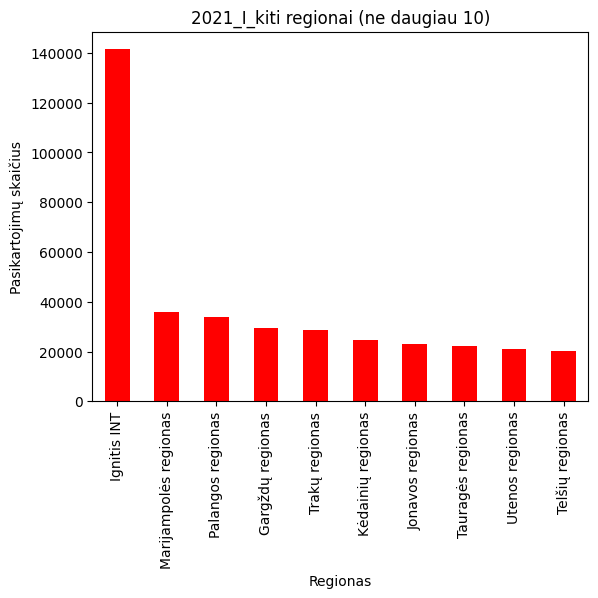

['2021', 'I', 'ŠPAM']
REGIONAS
Panevėžio regionas    63918
Šiaulių regionas      59532
Alytaus regionas      37817
Mažeikių regionas     24691
Name: count, dtype: int64


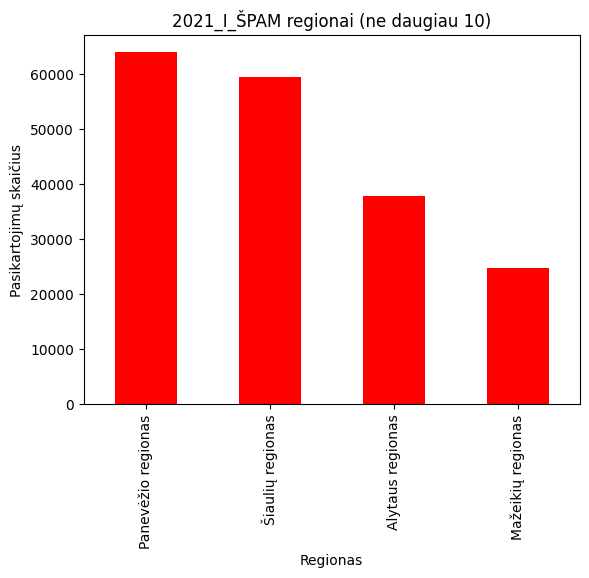

['2021', 'I', 'VKK']
REGIONAS
Vilniaus regionas      332825
Kauno regionas         196720
KlaipÄdos regionas     80698
Name: count, dtype: int64


C:\Users\Eridas\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 151 (\x97) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


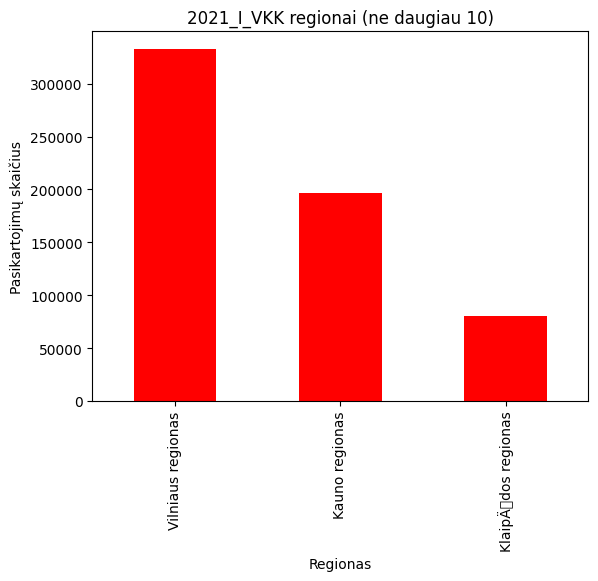

['2021', 'II', 'kiti']
REGIONAS
Ignitis INT              175991
Marijampolės regionas     37405
Palangos regionas         37027
Trakų regionas            30327
Kėdainių regionas         25489
Name: count, dtype: int64


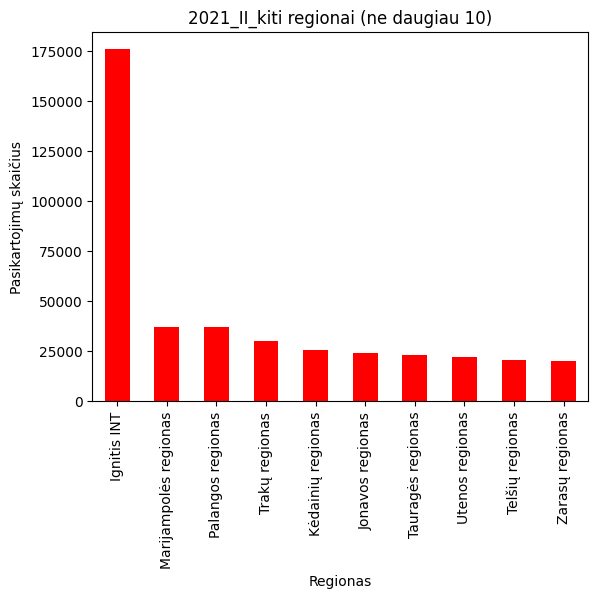

['2021', 'II', 'ŠPAM']
REGIONAS
Panevėžio regionas    66223
Šiaulių regionas      61409
Alytaus regionas      39132
Mažeikių regionas     25339
Name: count, dtype: int64


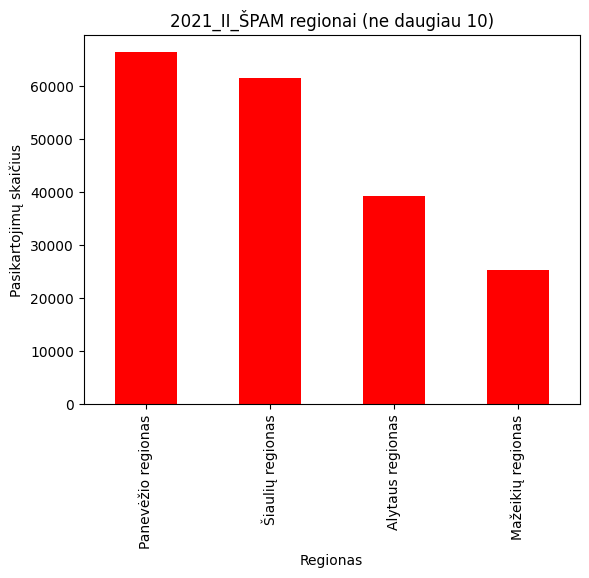

['2021', 'II', 'VKK']
REGIONAS
Vilniaus regionas      344656
Kauno regionas         203642
KlaipÄdos regionas     82134
Name: count, dtype: int64


C:\Users\Eridas\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 151 (\x97) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


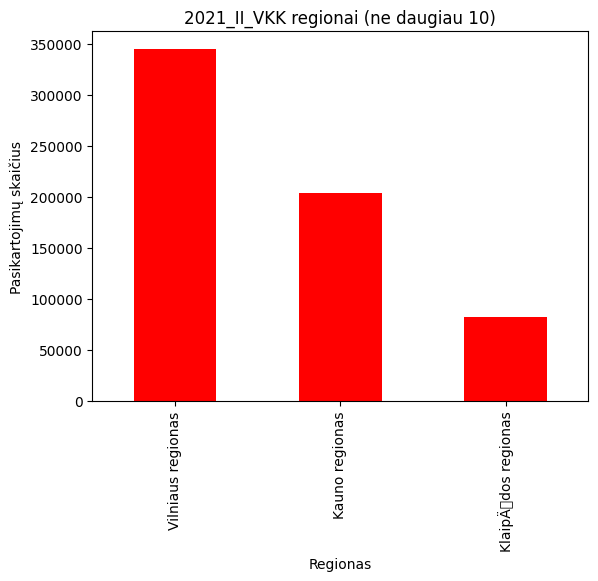

In [4]:
# Iteruojame per kiekvieną DataFrame žodyne.
# Analizuojame vartotojų pasiskirstymą sub-regionuose.

for name, df in df_dict.items():
    print(name.split('_'))
    # df.drop_duplicates(inplace=True)
    # print(df['REGIONAS'].unique())
    # print(len(df['REGIONAS'].unique()))
    
    # Regionų pasikartojimų skaičius
    region_counts = df['REGIONAS'].value_counts()

    # Spausdiname visus regionus su jų pasikartojimų skaičiumi
    print(region_counts.head(5))
    
    import matplotlib.pyplot as plt

    # Braižome regionų įrašų skaičių
    region_counts.head(10).plot(kind='bar',color='red')
    plt.xlabel('Regionas')
    plt.ylabel('Pasikartojimų skaičius')
    plt.title(f'{name} regionai (ne daugiau 10)')
    plt.xticks(rotation=90)
    plt.show() 

In [5]:
print(list(df_dict.keys()))

['2021_I_kiti', '2021_I_ŠPAM', '2021_I_VKK', '2021_II_kiti', '2021_II_ŠPAM', '2021_II_VKK']


In [88]:
df_dict['2021_II_ŠPAM']['REGIONAS'].unique().tolist()

['Šiaulių regionas',
 'Panevėžio regionas',
 'Mažeikių regionas',
 'Alytaus regionas']

In [6]:
import pandas as pd

def merge_regions(df1, df2, region, invers=False):
    """
    Atrenka tik nurodyto regiono eilutes iš dviejų DF, horizontaliai sujungia,
    o jei ilgiai nesutampa – apkarpo ilgesnį DF ir praneša apie atmestas eilutes.
    
    :param df1: Pirmasis DataFrame
    :param df2: Antrasis DataFrame
    :param region: Regionas, kurį reikia atrinkti
    :return: Sujungtas DataFrame
    """
    
    print(f"{region} (eil.)")
    # Filtruojame pagal regioną
    if invers:
        df1_region = df1[df1['REGIONAS'] != region]
        df2_region = df2[df2['REGIONAS'] != region]
    else:
        df1_region = df1[df1['REGIONAS'] == region]
        df2_region = df2[df2['REGIONAS'] == region]

    len_df1=len(df1_region)
    len_df2=len(df2_region)
    columns_to_keep=data_cols+['REGIONAS']
    df1_region=df1_region.filter(items=columns_to_keep)
    df2_region=df2_region.filter(items=columns_to_keep)
    df1_region.drop_duplicates(inplace=True) 
    df2_region.drop_duplicates(inplace=True) 
    len2_df1=len(df1_region)
    len2_df2=len(df2_region)
    print(f" I {len_df1}, dublikatai: {len_df1-len2_df1}; I {len_df2}, dublikatai: {len_df2-len2_df2} ")

    # Tikriname minimalų ilgį, kad būtų vienodas ilgis
    min_len = min(len(df1_region), len(df2_region))
    discarded_rows = abs(len(df1_region) - len(df2_region))

    # Apkarpome ilgesnį DF
    df1_region = df1_region.iloc[:min_len].reset_index(drop=True)
    df2_region = df2_region.iloc[:min_len].reset_index(drop=True)

    # Sujungiame horizontalai
    df_merged = pd.concat([df1_region, df2_region], axis=1)

    # Pranešame, kiek eilučių buvo atmesta
    print(f"Sujungta {region} {min_len} atmestas perteklius {discarded_rows} ({100*discarded_rows/min_len:1.1f}%)\n")

    return df_merged


In [7]:
# Didieji regionai dalinami į atskirus DF bei sujungiami pusmečiai

df_dict['2021_Viln']=merge_regions(df_dict['2021_I_VKK'],df_dict['2021_II_VKK'],'Vilniaus regionas')
print(df_dict['2021_Viln'].head(3),'\n')

df_dict['2021_Kaun']=merge_regions(df_dict['2021_I_VKK'],df_dict['2021_II_VKK'],'Kauno regionas')
print(df_dict['2021_Kaun'].head(3),'\n')

df_dict['2021_Klaip']=merge_regions(df_dict['2021_I_VKK'],df_dict['2021_II_VKK'],'KlaipÄdos regionas')
print(df_dict['2021_Klaip'].head(3),'\n')


Vilniaus regionas (eil.)
 I 332825, dublikatai: 2549; I 344656, dublikatai: 2480 
Sujungta Vilniaus regionas 330276 atmestas perteklius 11900 (3.6%)

       KWH01      KWH02      KWH03      KWH04      KWH05      KWH06  \
0  3459470.8  3389592.8  3656872.6  3631011.4  3591220.6  3698914.8   
1  1757181.0  1740484.0  1821948.0  1276322.0  1688700.0  1522816.0   
2  1281210.0  1164411.0  1286223.0  1427076.0  1804188.0  2403468.0   

            REGIONAS      KWH07      KWH08      KWH09      KWH10      KWH11  \
0  Vilniaus regionas  4047020.8  3941376.4  3819321.4  3913849.0  3877301.2   
1  Vilniaus regionas  2081792.0  1938692.0  1768692.0  1793992.0  1652484.0   
2  Vilniaus regionas  1569053.0  1697420.0  1530957.0  1710767.0  1612870.0   

       KWH12           REGIONAS  
0  3998284.0  Vilniaus regionas  
1  1684036.0  Vilniaus regionas  
2  1469231.0  Vilniaus regionas   

Kauno regionas (eil.)
 I 196720, dublikatai: 1197; I 203642, dublikatai: 1183 
Sujungta Kauno regionas 195523 

In [8]:
#--- (tęsinys))

df_dict['2021_Šiaulių']=merge_regions(df_dict['2021_I_ŠPAM'],df_dict['2021_II_ŠPAM'],'Šiaulių regionas')
print(df_dict['2021_Šiaulių'].head(5),'\n')

df_dict['2021_Panevėžio']=merge_regions(df_dict['2021_I_ŠPAM'],df_dict['2021_II_ŠPAM'],'Panevėžio regionas')
print(df_dict['2021_Panevėžio'].head(5),'\n')

df_dict['2021_Alytaus']=merge_regions(df_dict['2021_I_ŠPAM'],df_dict['2021_II_ŠPAM'],'Alytaus regionas')
print(df_dict['2021_Alytaus'].head(5),'\n')

df_dict['2021_Mažeikių']=merge_regions(df_dict['2021_I_ŠPAM'],df_dict['2021_II_ŠPAM'],'Mažeikių regionas')
print(df_dict['2021_Mažeikių'].head(5),'\n')

Šiaulių regionas (eil.)
 I 59532, dublikatai: 389; I 61409, dublikatai: 388 
Sujungta Šiaulių regionas 59143 atmestas perteklius 1878 (3.2%)

       KWH01     KWH02      KWH03      KWH04      KWH05      KWH06  \
0  1052547.8  908230.0  1135250.2  1120408.4  1185698.4  1253056.0   
1   612902.0  575464.0   639609.0   583835.0   540636.0   504831.0   
2   397998.0  440783.0   495874.0   420577.0   439847.0   486258.0   
3   267003.0  259120.0   286017.0   306008.0   428278.0   609811.0   
4   331916.0  294014.0   324627.0   334850.0   358182.0   331730.0   

           REGIONAS      KWH07      KWH08      KWH09      KWH10      KWH11  \
0  Šiaulių regionas  1362162.0  1255867.4  1108174.2  1095702.8  1083865.4   
1  Šiaulių regionas   528915.0   473817.0   552847.0   559184.0   499521.0   
2  Šiaulių regionas   703526.0   587306.0   489821.0   442851.0   404816.0   
3  Šiaulių regionas   355745.0   789328.0   478667.0   526271.0   501190.0   
4  Šiaulių regionas   283749.0   310889.0   325

In [9]:
#--- (tęsinys)

df_dict['2021_ignitis']=merge_regions(df_dict['2021_I_kiti'],df_dict['2021_II_kiti'],'Ignitis INT')
print(df_dict['2021_ignitis'].head(5),'\n')

df_dict['2021_kiti']=merge_regions(df_dict['2021_I_kiti'],df_dict['2021_II_kiti'],'Ignitis INT',invers=True)
print(df_dict['2021_kiti'].head(5),'\n')

Ignitis INT (eil.)
 I 141427, dublikatai: 453; I 175991, dublikatai: 99 
Sujungta Ignitis INT 140974 atmestas perteklius 34918 (24.8%)

     KWH01    KWH02    KWH03    KWH04    KWH05    KWH06     REGIONAS    KWH07  \
0   6075.4  31817.8   6508.0  11283.2  18920.0   5923.0  Ignitis INT  11875.4   
1   6815.0   6815.0   6815.0   6815.0   6815.0  41137.0  Ignitis INT  16310.0   
2      0.0      0.0    254.0  71580.0    254.0    254.0  Ignitis INT  51988.0   
3      0.0  33813.0  13691.0   8879.0   8427.0   6451.0  Ignitis INT   7996.0   
4  19909.0  19643.0  13258.0   9441.0   3783.0   1088.0  Ignitis INT   7824.0   

     KWH08    KWH09    KWH10    KWH11    KWH12     REGIONAS  
0  13408.6  10859.6  11180.0  11938.6  27690.6  Ignitis INT  
1  14714.0  11180.0  10826.0  11686.0  12564.0  Ignitis INT  
2   6276.0   3496.0   5004.0   6932.0   -402.0  Ignitis INT  
3   4614.0   7564.0  15998.0  10192.0  21636.0  Ignitis INT  
4   9438.0   9304.0  10242.0  11796.0  17016.0  Ignitis INT   

Ign

In [10]:
print(list(df_dict.keys()))
print(list(df_dict['2021_kiti'].keys()))
print(list(df_dict['2021_Viln'].keys()))

['2021_I_kiti', '2021_I_ŠPAM', '2021_I_VKK', '2021_II_kiti', '2021_II_ŠPAM', '2021_II_VKK', '2021_Viln', '2021_Kaun', '2021_Klaip', '2021_Šiaulių', '2021_Panevėžio', '2021_Alytaus', '2021_Mažeikių', '2021_ignitis', '2021_kiti']
['KWH01', 'KWH02', 'KWH03', 'KWH04', 'KWH05', 'KWH06', 'REGIONAS', 'KWH07', 'KWH08', 'KWH09', 'KWH10', 'KWH11', 'KWH12', 'REGIONAS']
['KWH01', 'KWH02', 'KWH03', 'KWH04', 'KWH05', 'KWH06', 'REGIONAS', 'KWH07', 'KWH08', 'KWH09', 'KWH10', 'KWH11', 'KWH12', 'REGIONAS']


In [11]:
import pandas as pd

def calculate_deciles(df):
    """Apskaičiuoja kiekvieno mėnesio duomenų decilių vidurkius"""
    decile_means = {}

    for month in range(1, 7):  # Pirmas pusmetis: mėnesiai 1-6
        col = f'KWH{month:02}'
        if col in df.columns:
            deciles = df[col].quantile([i / 10 for i in range(1, 10)]).values
            decile_means[col] = deciles

    return pd.DataFrame(decile_means, index=[f'D{i}' for i in range(1, 10)])

# Apskaičiuojame decilių vidurkius
df1_deciles = calculate_deciles(df_dict['2021_I_kiti'])
df2_deciles = calculate_deciles(df_dict['2021_II_kiti'])

# Horizontaliai sujungiame duomenis
df_deciles_combined = pd.concat([df1_deciles, df2_deciles], axis=1)

print(df_deciles_combined)


    KWH01  KWH02  KWH03  KWH04   KWH05  KWH06
D1    0.0    0.0    0.0    0.0    0.00    0.0
D2    0.0    0.0    0.0    5.0   10.00   31.0
D3    0.0   46.0   49.0   54.0   51.00   67.0
D4   58.0   84.0   84.0   90.0   84.54  100.0
D5  100.0  126.0  120.0  127.0  120.00  140.0
D6  150.0  184.0  173.0  180.0  172.00  198.0
D7  226.0  270.0  254.0  260.0  250.00  272.0
D8  370.0  429.0  400.0  400.0  376.00  394.0
D9  700.0  850.0  730.0  693.0  609.00  619.0


In [12]:
import pandas as pd

def calculate_deciles(df):
    """Apskaičiuoja kiekvieno mėnesio duomenų decilių vidurkius"""
    decile_means = {}

    for month in range(1, 7):  # Pirmas pusmetis: mėnesiai 1-6
        col = f'KWH{month:02}'
        if col in df.columns:
            deciles = df[col].quantile([i / 10 for i in range(1, 10)]).values
            decile_means[col] = deciles

    return pd.DataFrame(decile_means, index=[f'D{i}' for i in range(1, 10)])

# Sukuriame duomenų pavyzdžius
df1 = df_dict['2021_I_kiti']
df2 = df_dict['2021_II_kiti']

# Apskaičiuojame decilių vidurkius
df1_deciles = calculate_deciles(df1)
df2_deciles = calculate_deciles(df2)

# Horizontaliai sujungiame duomenis
df_deciles_combined = pd.concat([df1_deciles, df2_deciles], axis=1)

print(df_deciles_combined)


    KWH01  KWH02  KWH03  KWH04   KWH05  KWH06
D1    0.0    0.0    0.0    0.0    0.00    0.0
D2    0.0    0.0    0.0    5.0   10.00   31.0
D3    0.0   46.0   49.0   54.0   51.00   67.0
D4   58.0   84.0   84.0   90.0   84.54  100.0
D5  100.0  126.0  120.0  127.0  120.00  140.0
D6  150.0  184.0  173.0  180.0  172.00  198.0
D7  226.0  270.0  254.0  260.0  250.00  272.0
D8  370.0  429.0  400.0  400.0  376.00  394.0
D9  700.0  850.0  730.0  693.0  609.00  619.0


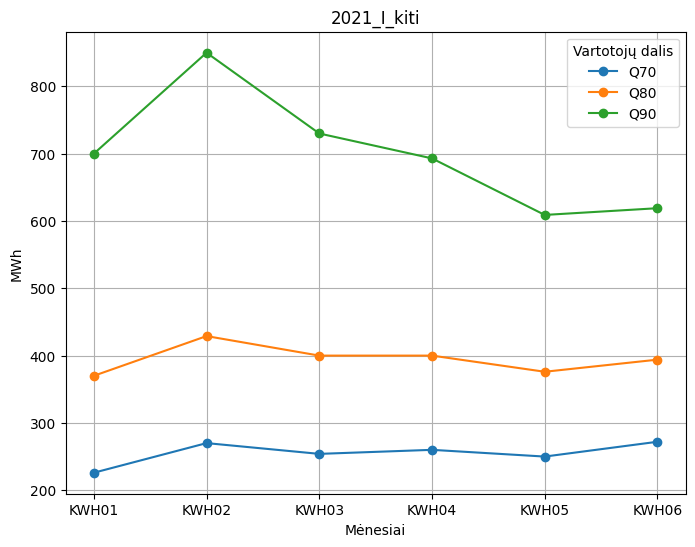

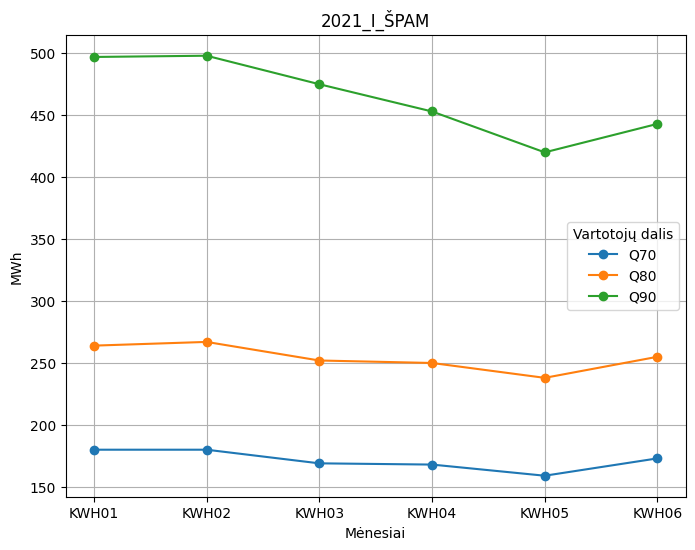

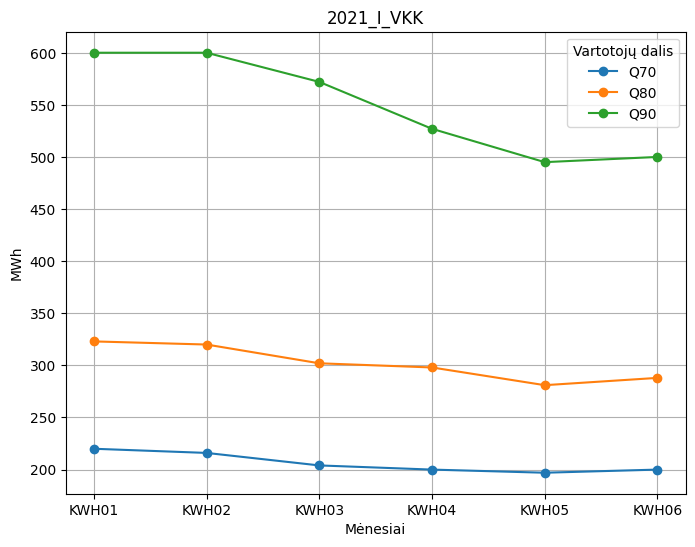

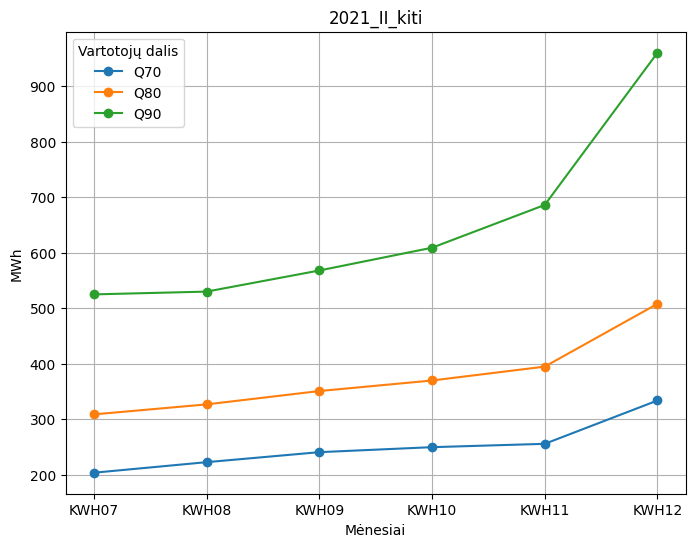

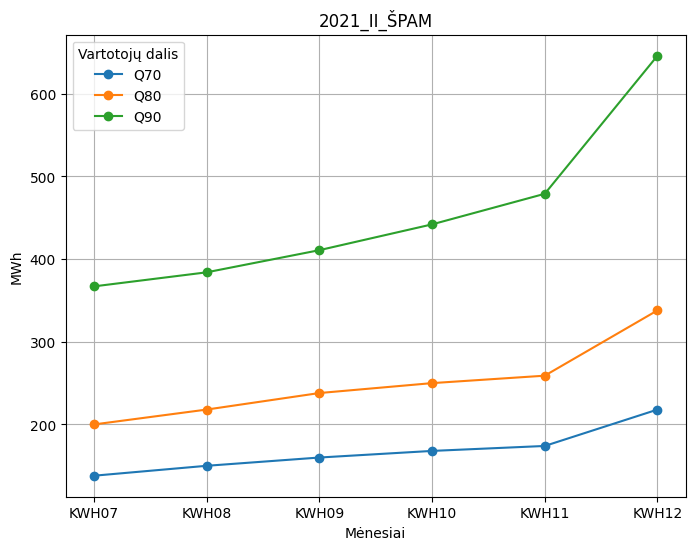

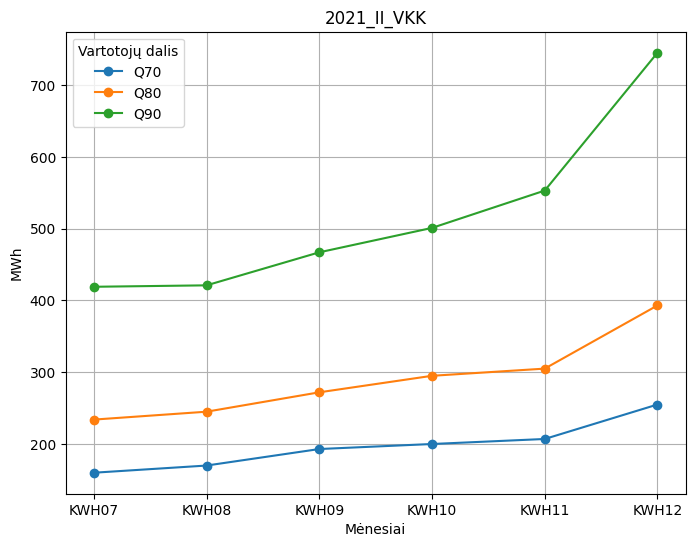

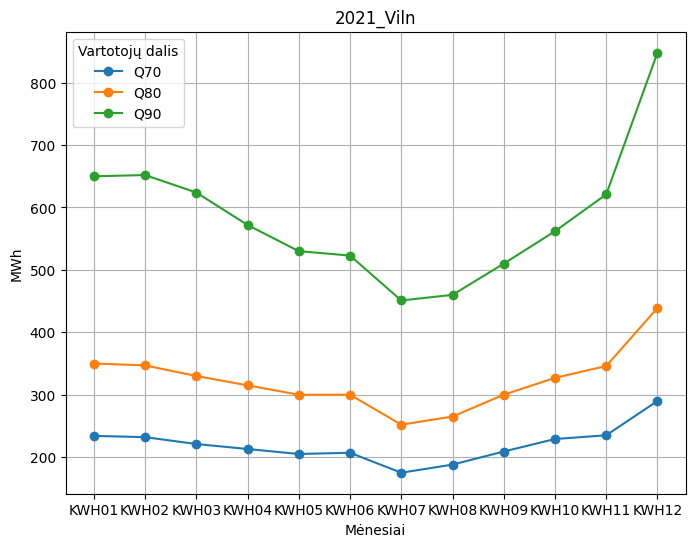

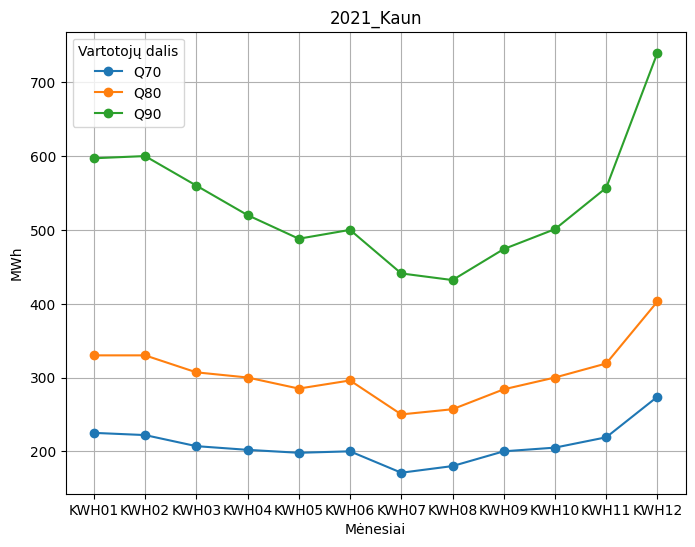

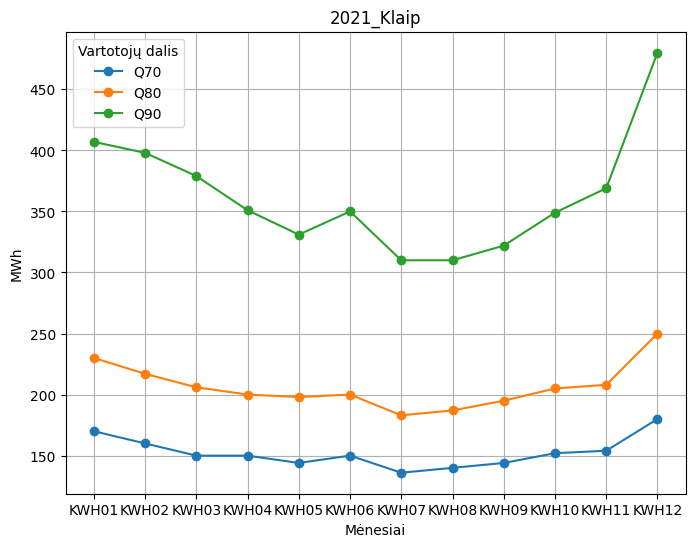

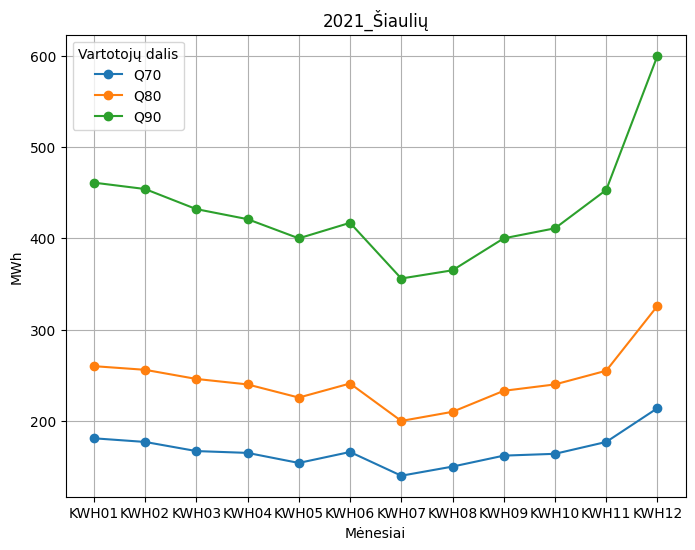

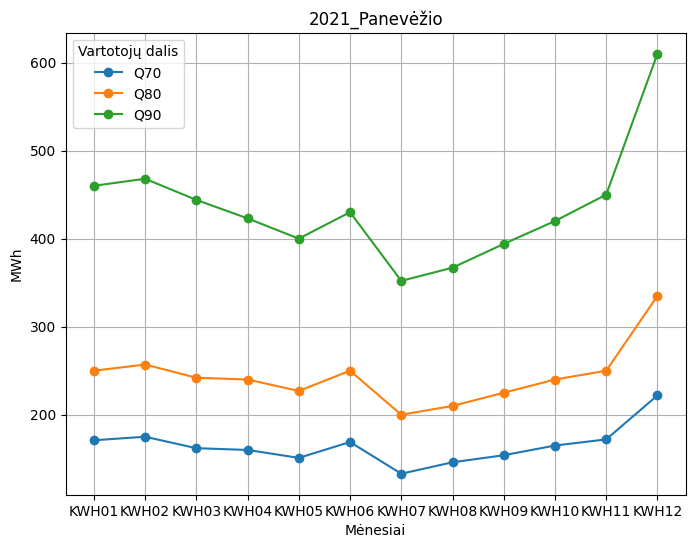

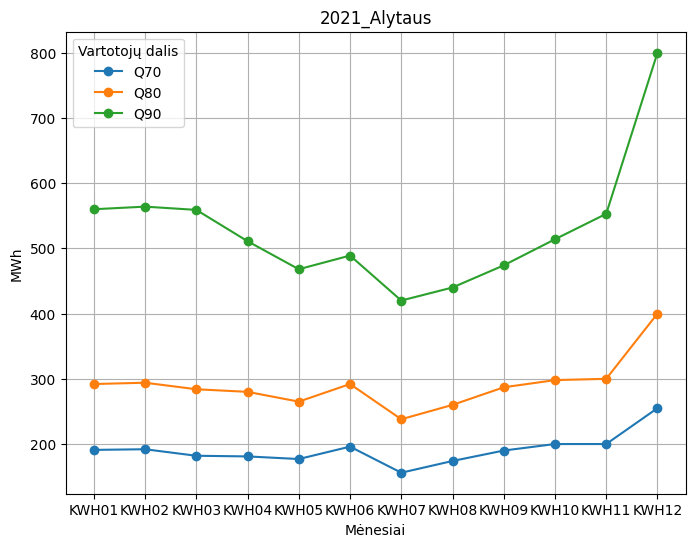

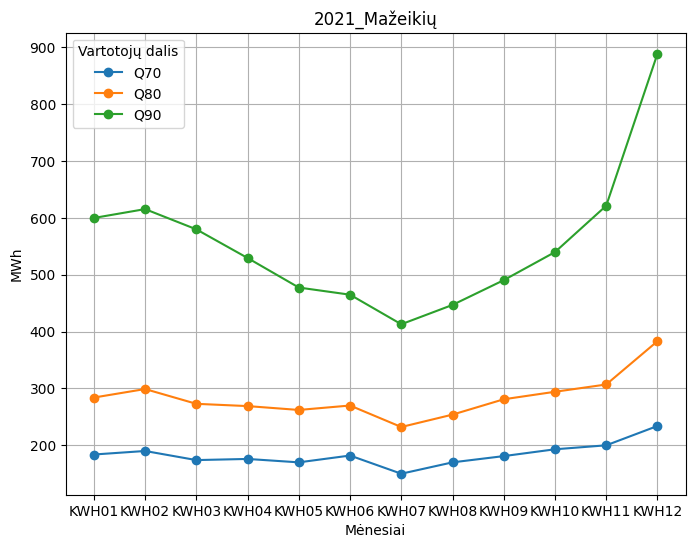

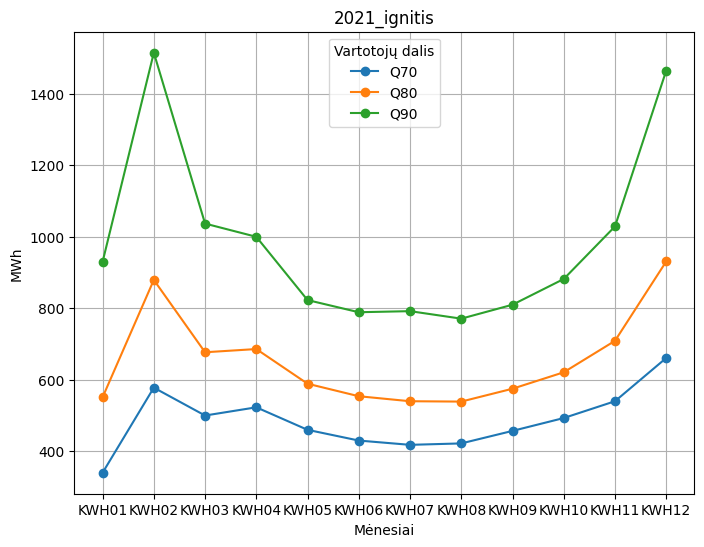

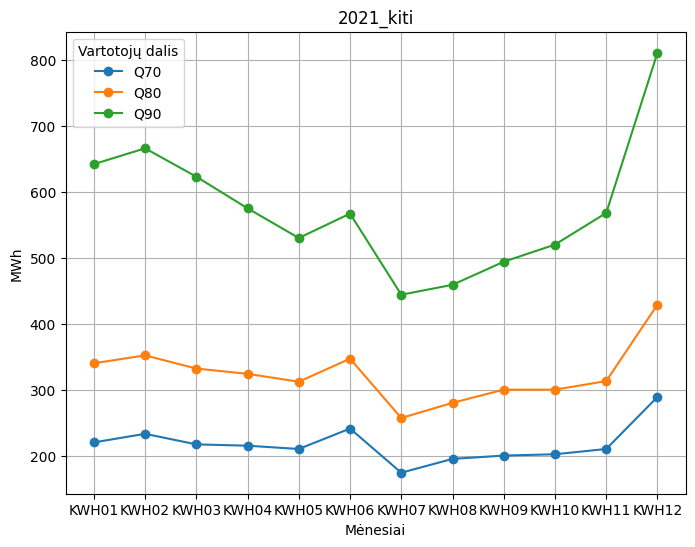

________________________
* Regionų grupių kodai:
  VKK - Vilnius, Kaunas, Klaipėda
  ŠPAM - Šiauliai, Panevėžys, Alytus, Mažeikiai
  kiti - mažiausių Lietuvos regionų vartotojai


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

for name, df in df_dict.items():
    # Atrenkame tik laukus, kurie prasideda "KW"
    kw_fields = [col for col in df.columns if col.startswith('KWH')]
    
    # Sukuriame duomenų rinkinį tik su KW laukais
    if kw_fields:  # Jei yra tokių laukų
        kw_data = df[kw_fields]
        
        # Nustatome slenksčius
        quantiles = kw_data.quantile([0.7, 0.8, 0.9])
        
        # Nupiešiame grafiką
        plt.figure(figsize=(8, 6))
        for quantile in quantiles.index:
            plt.plot(kw_fields, quantiles.loc[quantile], label=f'Q{int(quantile * 100)}', marker='o')
        
        # Pritaikome grafikui pavadinimą ir ašis
        # plt.title(f"Vartotojų pasiskirstymas {name[:4]} m. {name.split('-')[1].split('_')[0]} p. {name.split('-')[1].split('_')[1]}*")
        duomenys=name.split('_')
        plt.title(name)
        plt.xlabel("Mėnesiai")
        plt.ylabel("MWh")
        plt.legend(title="Vartotojų dalis")
        plt.grid(True)
        
        # Parodome grafiką
        plt.show()

print('________________________\n* Regionų grupių kodai:')
print('  VKK - Vilnius, Kaunas, Klaipėda')
print('  ŠPAM - Šiauliai, Panevėžys, Alytus, Mažeikiai')
print('  kiti - mažiausių Lietuvos regionų vartotojai')

In [20]:
import re

print(name)
info=re.split(r'[^\w]+', name)
print(info)


2021_II_VKK
['2021_II_VKK']
